In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.table import Table
import seaborn as sns
# from toolbox import plot_tools
import scipy.stats
from toolbox.wololo import redshift2lumdistance, arcsectokpc
import astropy.units as u
from starlight_toolkit.dust import CAL
from matplotlib.patches import Ellipse
import matplotlib as mpl

plt.rc('text', usetex=True)
plt.rc('font', family='serif') 

sns.set_style('ticks')
palette = sns.diverging_palette(220, 20, n=7)
halpha_palette = sns.light_palette('goldenrod',  4)
f275w_palette = sns.light_palette('mediumvioletred', 4)
f606w_palette = sns.light_palette('indigo', 4)

age_cmap = sns.diverging_palette(220, 20, as_cmap=True, sep=1)

mass_dict = {'JO201': 44194800000,
             'JO204': 54968402000,
             'JW100': 292875993000,
             'JW39': 164373004000,
             'JO175': 33957900300,
             'JO206': 77743301000
}

halpha_input = Table.read('/home/ariel/Workspace/GASP/HST/Data/halpha_bagpipes_input.fits')
f275w_input = Table.read('/home/ariel/Workspace/GASP/HST/Data/f275w_bagpipes_input.fits')
f606w_input = Table.read('/home/ariel/Workspace/GASP/HST/Data/f606w_bagpipes_input.fits')
optical_only_input = Table.read('/home/ariel/Workspace/GASP/HST/Data/optical_only_bagpipes_input.fits')

output_halpha = Table.read('/home/ariel/Workspace/GASP/HST/Data/halpha_dexp_logprior_single_bagpipes_results.fits')
output_f275w = Table.read('/home/ariel/Workspace/GASP/HST/Data/f275w_dexp_logprior_single_bagpipes_results.fits')
output_f606w = Table.read('/home/ariel/Workspace/GASP/HST/Data/f606w_dexp_logprior_single_bagpipes_results.fits')
output_optical_only = Table.read('/home/ariel/Workspace/GASP/HST/Data/optical_only_dexp_logprior_single_bagpipes_results.fits')

halpha_input = halpha_input[(~halpha_input['disk']) & ((halpha_input['level'] == 0) | (halpha_input['leaf_flag'] == 1))]
f275w_input = f275w_input[(~f275w_input['disk']) & ((f275w_input['level'] == 0) | (f275w_input['leaf_flag'] ==1))]

complex_evolution = Table.read('/home/ariel/Workspace/GASP/HST/Data/complex_evolution_fornax_10.fits')
complex_evolution = complex_evolution[~output_f606w['bad_fit']]

halpha_input = halpha_input[~output_halpha['bad_double_fit'] & ~output_halpha['bad_fit']]
output_halpha = output_halpha[~output_halpha['bad_double_fit'] & ~output_halpha['bad_fit']]

f275w_input = f275w_input[~output_f275w['bad_double_fit'] & ~output_f275w['bad_fit']]
output_f275w = output_f275w[~output_f275w['bad_double_fit'] & ~output_f275w['bad_fit']]

f606w_input = f606w_input[~output_f606w['bad_fit']]
output_f606w = output_f606w[~output_f606w['bad_fit']]

output_halpha['galaxy'] = output_halpha['galaxy'].astype(str)
output_f275w['galaxy'] = output_f275w['galaxy'].astype(str)
output_f606w['galaxy'] = output_f606w['galaxy'].astype(str)

output_halpha['Location'] = np.zeros_like(output_halpha['galaxy'])
output_halpha['Location'][halpha_input['tail_gal_flag'] == 0] = np.full((halpha_input['tail_gal_flag'] == 0).sum(),
                                                                        'Tail')
output_halpha['Location'][halpha_input['tail_gal_flag'] == 1] = np.full((halpha_input['tail_gal_flag'] == 1).sum(),
                                                                        'Extraplanar')

output_f275w['Location'] = np.zeros_like(output_f275w['galaxy'])
output_f275w['Location'][f275w_input['tail_gal_flag'] == 0] = np.full((f275w_input['tail_gal_flag'] == 0).sum(),
                                                                      'Tail')
output_f275w['Location'][f275w_input['tail_gal_flag'] == 1] = np.full((f275w_input['tail_gal_flag'] == 1).sum(),
                                                                      'Extraplanar')

output_f606w['Location'] = np.zeros_like(output_f606w['galaxy'])
output_f606w['Location'][f606w_input['tail_gal_flag'] == 0] = np.full((f606w_input['tail_gal_flag'] == 0).sum(),
                                                                      'Tail')
output_f606w['Location'][f606w_input['tail_gal_flag'] == 1] = np.full((f606w_input['tail_gal_flag'] == 1).sum(),
                                                                      'Extraplanar')

output_halpha['galaxy_mass'] = np.zeros_like(output_halpha['mwage'])
for i in range(len(output_halpha)):
    output_halpha['galaxy_mass'][i] = np.log10(mass_dict[output_halpha['galaxy'][i]])

output_f275w['galaxy_mass'] = np.zeros_like(output_f275w['mwage'])
for i in range(len(output_f275w)):
    output_f275w['galaxy_mass'][i] = np.log10(mass_dict[output_f275w['galaxy'][i]])

output_f606w['galaxy_mass'] = np.zeros_like(output_f606w['mwage'])
for i in range(len(output_f606w)):
    output_f606w['galaxy_mass'][i] = np.log10(mass_dict[output_f606w['galaxy'][i]])

output_halpha['mwage'] *= 1e3
output_f275w['mwage'] *= 1e3
output_f606w['mwage'] *= 1e3
output_optical_only['mwage'] *= 1e3

output_halpha['age'] *= 1e3
output_f275w['age'] *= 1e3
output_f606w['age'] *= 1e3
output_optical_only['age'] *= 1e3

output_halpha['sfr'] = np.log10(output_halpha['sfr'])
output_f275w['sfr'] = np.log10(output_f275w['sfr'])
output_f606w['sfr'] = np.log10(output_f606w['sfr'])

output_halpha['Av'] = output_halpha['Av'] * output_halpha['eta']
output_f275w['Av'] = output_f275w['Av'] * output_f275w['eta']
output_f606w['Av'] = output_f606w['Av'] * output_f606w['eta']

conversion_factor = arcsectokpc(halpha_input['galaxy_redshift'])
halpha_input['area_exct'] = halpha_input['area_exact'] * conversion_factor ** 2

conversion_factor = arcsectokpc(f275w_input['galaxy_redshift'])
f275w_input['area_exct'] = f275w_input['area_exact'] * conversion_factor ** 2

conversion_factor = arcsectokpc(f606w_input['galaxy_redshift'])
f606w_input['area_exct'] = f606w_input['area_exact'] * conversion_factor ** 2

aimss_data = Table.read('/home/ariel/Workspace/GASP/HST/Data/aimss/aimss.fits')
aimss_data = aimss_data[((aimss_data['Type'] == 3) | (aimss_data['Type'] == 5)) & (aimss_data['M_'] < 1e8)]
aimss_sigma = np.log10(aimss_data['M_']/(np.pi*(aimss_data['Re']/1000)**2))

fornax_dwarfs = Table.read('/home/ariel/Workspace/GASP/HST/Data/fornax_dwarfs/fornax_dwarfs_2018.fits')
fornax_dwarfs_2022 = Table.read('/home/ariel/Workspace/GASP/HST/Data/fornax_dwarfs/fornax_dwarfs.fits')


print(len(output_halpha), len(output_f275w), len(output_f606w))

347 851 296


In [13]:
fornax_r_kpc = fornax_dwarfs['reff'] * arcsectokpc(0.0045)
fornax_r_kpc_2022 = fornax_dwarfs_2022['Re'] * arcsectokpc(0.0045)

fornax_mass = 1.15 + 0.7*(fornax_dwarfs['gmag1']-fornax_dwarfs['imag1']) - 0.4 * (fornax_dwarfs['imag1'] - 31.51) + 0.04
fornax_mass_2022 = 1.15 + 0.7*(fornax_dwarfs_2022['g_mag']-fornax_dwarfs_2022['i_mag']) - 0.4 * (fornax_dwarfs_2022['i_mag'] - 31.51) + 0.04


fornax_sigma = np.log10( (10**fornax_mass) / (np.pi * fornax_r_kpc**2) )
fornax_sigma_2022 = np.log10( (10**fornax_mass_2022) / (np.pi * fornax_r_kpc_2022**2) )


fornax_mass = np.concatenate([fornax_mass, fornax_mass_2022])
fornax_sigma = np.concatenate([fornax_sigma, fornax_sigma_2022])

/home/ariel/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ariel/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ariel/.local/lib/python3.8/site-packages/seaborn/distributions.py:1182: UserWarning: The following kwargs were not used by contour: 'lw'
  cset = contour_func(


2.0612564839328895


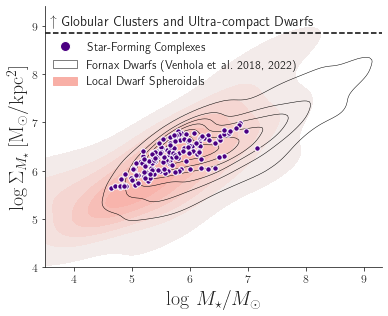

In [14]:
import matplotlib.patches as  mpatches
from matplotlib.lines import Line2D

dwarfs_cmap = sns.color_palette('light:#F8AFA6', as_cmap=True)
gc_cmap = sns.light_palette('firebrick', as_cmap=True)

arrow = '\u2191'

fig, ax = plt.subplots(1, 1, figsize=(5.5, 4.5), sharex=True)

sns.kdeplot(np.log10(aimss_data['M_'])[aimss_data['Type']==3].tolist(), 
            aimss_sigma[aimss_data['Type']==3].tolist(), 
            levels=7, cmap=dwarfs_cmap, fill=True)

sns.kdeplot(fornax_mass, fornax_sigma, zorder=1, lw=0.5, levels=7, color='k', linewidths=0.5, thresh=0.05)
# plt.scatter(fornax_mass, fornax_sigma)

gc_limit = np.percentile(aimss_sigma[(aimss_data['Type']==5) & (aimss_data['M_'] > 10**4.5) & (aimss_data['M_'] < 10**8)], 5)
ax.axhline(gc_limit, color='k', ls='dashed')
ax.annotate('\u2191 Globular Clusters and Ultra-compact Dwarfs', xy=(3.575, gc_limit+0.1), 
            va='bottom', fontsize=14)

flag = f606w_input['resolved_flag'].astype(bool) & (output_f606w['stellar_mass']>3)

# scatter = ax.scatter(output_f606w['stellar_mass'][flag],
#                      np.log10((10**output_f606w['stellar_mass'])/f606w_input['area_exact'])[flag],
#                      c=output_f606w['mwage'][flag], cmap=age_cmap, vmin=10, vmax=150, edgecolors='white', 
#                      s=(300*f606w_input['r_core_corr']/np.max(f606w_input['r_core_corr']))[flag])

scatter = ax.scatter(output_f606w['stellar_mass'][flag],
                     np.log10((10**output_f606w['stellar_mass'])/f606w_input['area_exact'])[flag],
                     c='indigo', edgecolors='w', s=30, label='Star-Forming Complexes')

print(gc_limit - np.percentile(np.log10((10**output_f606w['stellar_mass'])/f606w_input['area_exact'])[flag], 95))

# ax.annotate('Dwarf Spheroidals', xy=(6.7, 4.4), va='bottom', fontsize=14, color='#F8AFA6')

handles = [Line2D([0], [0], label='Star-Forming Complexes', marker='o', markersize=10, 
           markeredgecolor='w', markerfacecolor='indigo', linestyle=''),
           mpatches.Patch(facecolor='None', lw=0.5, edgecolor='k', label='Fornax Dwarfs (Venhola et al. 2018, 2022)'),
           mpatches.Patch(color='#F8AFA6', label='Local Dwarf Spheroidals')]
ax.legend(handles=handles, fontsize=12, frameon=False, loc=(0.01, 0.67))

plt.ylabel(r'$\log \Sigma_{M_\star}\,\mathrm{[M_\odot/kpc^2]}$', fontsize=20)
plt.xlabel(r'$\log\,M_\star/M_\odot$', fontsize=20)

plt.xlim(3.5, 9.3)
plt.ylim(4, 9.4)

# cb_ax = plt.gca().inset_axes([0.05, 0.8, 0.33, 0.04])
# cb = plt.colorbar(cax=cb_ax, orientation='horizontal', mappable=scatter)
# cb.set_label(r'$\langle\,t_\star\,\rangle_M\,\mathrm{[Myr]}$', fontsize=14)
# cb_ax.tick_params(axis='x', labelsize=12)

sns.despine()

plt.tick_params(axis='both', labelsize=12)

fig.tight_layout()

plt.savefig('mass-sigma_mass.pdf')
plt.savefig('mass-sigma_mass_presentations.jpg', dpi=500)

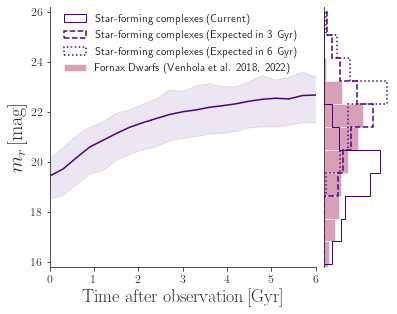

In [15]:
fig = plt.figure(figsize=(5.5, 4.25))

gs = fig.add_gridspec(1, 2,  width_ratios=(4, 1),
                      left=0.12, right=0.98, bottom=0.13, top=0.98,
                      wspace=0.05, hspace=0.05)

ax_mag = fig.add_subplot(gs[0, 0])
# ax_color = fig.add_subplot(gs[1, 0], sharex=ax_mag)
mag_hist = fig.add_subplot(gs[0, 1], sharey=ax_mag)
# color_hist = fig.add_subplot(gs[1, 1], sharey=ax_color)

flag = (output_f606w['mwage'] > 50) & ~np.isnan(complex_evolution['magnitudes_r'][:,-1]) & ~np.isinf(complex_evolution['magnitudes_r'][:,-1])

ax_mag.plot(complex_evolution['time_steps'][0], np.median(complex_evolution['magnitudes_r'][flag], axis=0), 
           color='indigo') 
ax_mag.fill_between(complex_evolution['time_steps'][0], 
                   np.percentile(complex_evolution['magnitudes_r'][flag], 25, axis=0), 
                   np.percentile(complex_evolution['magnitudes_r'][flag], 75, axis=0), 
                   color='indigo', alpha=0.1)  

fornax_mags = np.concatenate([fornax_dwarfs_2022['r_mag'], fornax_dwarfs['rmag1']])

mag_hist.hist(complex_evolution['magnitudes_r'][:,0][flag], orientation='horizontal', density=True, histtype='step', 
              color='indigo', range=[15, 26], bins=12, ls='solid', label='Star-forming complexes (Current)')
mag_hist.hist(complex_evolution['magnitudes_r'][:,-25][flag], orientation='horizontal', density=True, histtype='step', 
              color='indigo', range=[15, 26], bins=12, label='Star-forming complexes (Expected in 3 Gyr)', ls='dashed', lw=1.5)
mag_hist.hist(complex_evolution['magnitudes_r'][:,-15][flag], orientation='horizontal', density=True, histtype='step', 
              color='indigo', range=[15, 26], bins=12, label='Star-forming complexes (Expected in 6 Gyr)', ls='dotted', lw=1.5)
mag_hist.hist(fornax_mags, alpha=0.5, orientation='horizontal', density=True, range=[15,26], bins=12,
             color='#B34270', label='Fornax Dwarfs (Venhola et al. 2018, 2022)')

ax_mag.set_ylim(15.8, 26.2)
ax_mag.set_xlim(0, 6)

# ax_mag.axvline(x=3, lw=1, color='k', ls='dashed', zorder=20)

fig.legend(frameon=False, fontsize=11, loc=(0.15, 0.75))

ax_mag.tick_params(axis='both', labelsize=12)
mag_hist.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)

sns.despine(ax=mag_hist, bottom=True, left=False)
sns.despine(ax=ax_mag)

ax_mag.set_xlabel('$\mathrm{Time \; after \; observation \, [Gyr]}$', fontsize=18)
ax_mag.set_ylabel('$m_r \, \mathrm{[mag]}$', fontsize=20)

plt.savefig('fornax.pdf')
plt.savefig('fornax.jpg', dpi=300)

In [ ]:
complex_evolution['time_steps'][0][-25]

In [ ]:
fig = plt.figure(figsize=(5.5, 4.25))

gs = fig.add_gridspec(1, 2,  width_ratios=(4, 1),
                      left=0.12, right=0.98, bottom=0.13, top=0.98,
                      wspace=0.05, hspace=0.05)

ax_mag = fig.add_subplot(gs[0, 0])
mag_hist = fig.add_subplot(gs[0, 1], sharey=ax_mag)

flag = (output_f606w['mwage'] > 50) & ~np.isnan(complex_evolution['magnitudes_r'][:,-1]) & ~np.isinf(complex_evolution['magnitudes_r'][:,-1])

ax_mag.plot(complex_evolution['time_steps'][0], np.median(complex_evolution['magnitudes_g'][flag]-complex_evolution['magnitudes_r'][flag], axis=0), 
           color='indigo') 

fornax_r = np.concatenate([fornax_dwarfs_2022['r_mag'], fornax_dwarfs['rmag1']])
fornax_g = np.concatenate([fornax_dwarfs_2022['g_mag'], fornax_dwarfs['gmag1']])
fornax_i = np.concatenate([fornax_dwarfs_2022['i_mag'], fornax_dwarfs['imag1']])

mag_hist.hist(complex_evolution['magnitudes_g'][:,0][flag]-complex_evolution['magnitudes_r'][:,0][flag], orientation='horizontal', density=True, histtype='step', 
              color='indigo', bins=12, ls='dashed', label='Star-forming complexes (Current)')
mag_hist.hist(complex_evolution['magnitudes_g'][:,-15][flag]-complex_evolution['magnitudes_r'][:,-15][flag], orientation='horizontal', density=True, histtype='step', 
              color='indigo', bins=12, label='Star-forming complexes (Expected in 3 Gyr)')
mag_hist.hist(fornax_g-fornax_r, alpha=0.5, orientation='horizontal', density=True, bins=12,
             color='#B34270', label='Fornax LSBs (Venhola et al. 2022)')


fig.legend(frameon=False, fontsize=11, loc=(0.15, 0.76))

ax_mag.tick_params(axis='both', labelsize=12)
mag_hist.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)

sns.despine(ax=mag_hist, bottom=True, left=False)
sns.despine(ax=ax_mag)

print(complex_evolution['time_steps'][0][-6])

In [ ]:
plt.hist(2.35*f606w_input['r_core_corr'], range=[0, 1.5], density=True)
plt.hist(fornax_dwarfs['Re'], range=[0, 1.5], histtype='step', density=True)

In [ ]:
aimss_data = Table.read('/home/ariel/Workspace/GASP/HST/Data/aimss/aimss.fits')
aimss_data = aimss_data[(aimss_data['Type'] == 2) | (aimss_data['Type'] == 3) | (aimss_data['Type'] == 5)]
aimss_sigma = np.log10(aimss_data['M_']/((4*np.pi)*(aimss_data['Re']/1000)**2))

fig, ax = plt.subplots(1, 1, figsize=(6.5, 5.5), sharex=True)

flag = halpha_input['resolved_flag'].astype(bool)

ax.scatter(np.log10(halpha_input['r_core_corr'][flag]),
           np.log10((10**output_halpha['stellar_mass'])/halpha_input['area_exact'])[flag], 
           color=halpha_palette[2], label=r'$H\alpha$ Clumps', edgecolors='white', s=50)

flag = f275w_input['resolved_flag'].astype(bool)

ax.scatter(np.log10(f275w_input['r_core_corr'][flag]),
           np.log10((10**output_f275w['stellar_mass'])/f275w_input['area_exact'])[flag],
           color=f275w_palette[2], label=r'F275W Clumps', edgecolors='white', s=50)

flag = f606w_input['resolved_flag'].astype(bool) & (output_f606w['stellar_mass']>3)

ax.scatter(np.log10(f606w_input['r_core_corr'][flag]),
           np.log10((10**output_f606w['stellar_mass'])/f606w_input['area_exact'])[flag],
           color=f606w_palette[2], label=r'Star-Forming Complexes', edgecolors='white', s=50)

sns.scatterplot(np.log10(aimss_data['Re']/1000).tolist(), aimss_sigma.tolist(), 
                hue=aimss_data['Type'])


plt.ylabel(r'$\log \Sigma_M\,\mathrm{[M_\odot/kpc^2]}$', fontsize=20)
plt.xlabel(r'$\log\, R$', fontsize=20)

# ax[0].legend(frameon=False, fontsize=13)

# ax[0].tick_params(axis='both', labelsize=12)
# ax[1].tick_params(axis='both', labelsize=12)

sns.despine()

plt.tick_params(axis='both', labelsize=12)

fig.subplots_adjust(hspace=0.05)

plt.savefig('r-sigma_mass.pdf')
# plt.savefig('mass-sigma_mass_presentations.jpg', dpi=300)

Text(0, 0.5, 'log F606W Flux')

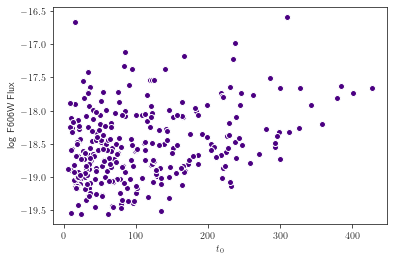

In [19]:
plt.scatter(output_f606w['age'], np.log10(f606w_input['F606W']), edgecolors='w', color='indigo')
plt.xlabel(r'$t_0$')
plt.ylabel(r'log F606W Flux')